# Code to generate particle evolution snap-shots

In [154]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import imageio
import cv2

## Load velocity fields

In [155]:
ForeGroundVx = np.load( 'Vx1.npy' )
ForeGroundVy = np.load( 'Vy1.npy' )

BackGroundVx = np.load( 'Vx2.npy' )
BackGroundVy = np.load( 'Vy2.npy' )

Height, Width = ForeGroundVx.shape

if Height == Width :
    GridSize = Height
else :
    print("ERROR!!")

## Parameters

In [156]:
NumberForeGroundParticles = 1000
NumberBackGroundParticles = 1000

SpeedRatio = 1

BackGroundVx = BackGroundVx * SpeedRatio
BackGroundVy = BackGroundVy * SpeedRatio

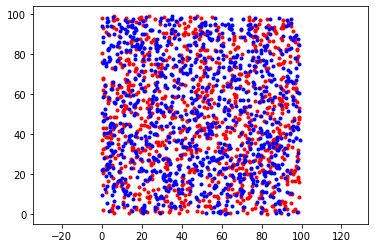

In [157]:
ForeGroundParticleX = (GridSize-1) * np.random.rand( NumberForeGroundParticles )
ForeGroundParticleY = (GridSize-1) * np.random.rand( NumberForeGroundParticles )

BackGroundParticleX = (GridSize-1) * np.random.rand( NumberBackGroundParticles )
BackGroundParticleY = (GridSize-1) * np.random.rand( NumberBackGroundParticles )

plt.plot( ForeGroundParticleX , ForeGroundParticleY , '.r' )
plt.plot( BackGroundParticleX , BackGroundParticleY , '.b' )
plt.axis('equal')
plt.show()

In [158]:
GridXY = range(GridSize)

ForeGroundVxInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , ForeGroundVx )
ForeGroundVyInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , ForeGroundVy )

BackGroundVxInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , BackGroundVx )
BackGroundVyInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , BackGroundVy )

In [159]:
ForeGroundParticleVx = ForeGroundVxInterp( (ForeGroundParticleY , ForeGroundParticleX) )
ForeGroundParticleVy = ForeGroundVyInterp( (ForeGroundParticleY , ForeGroundParticleX) )

BackGroundParticleVx = BackGroundVxInterp( (BackGroundParticleY , BackGroundParticleX) )
BackGroundParticleVy = BackGroundVyInterp( (BackGroundParticleY , BackGroundParticleX) )

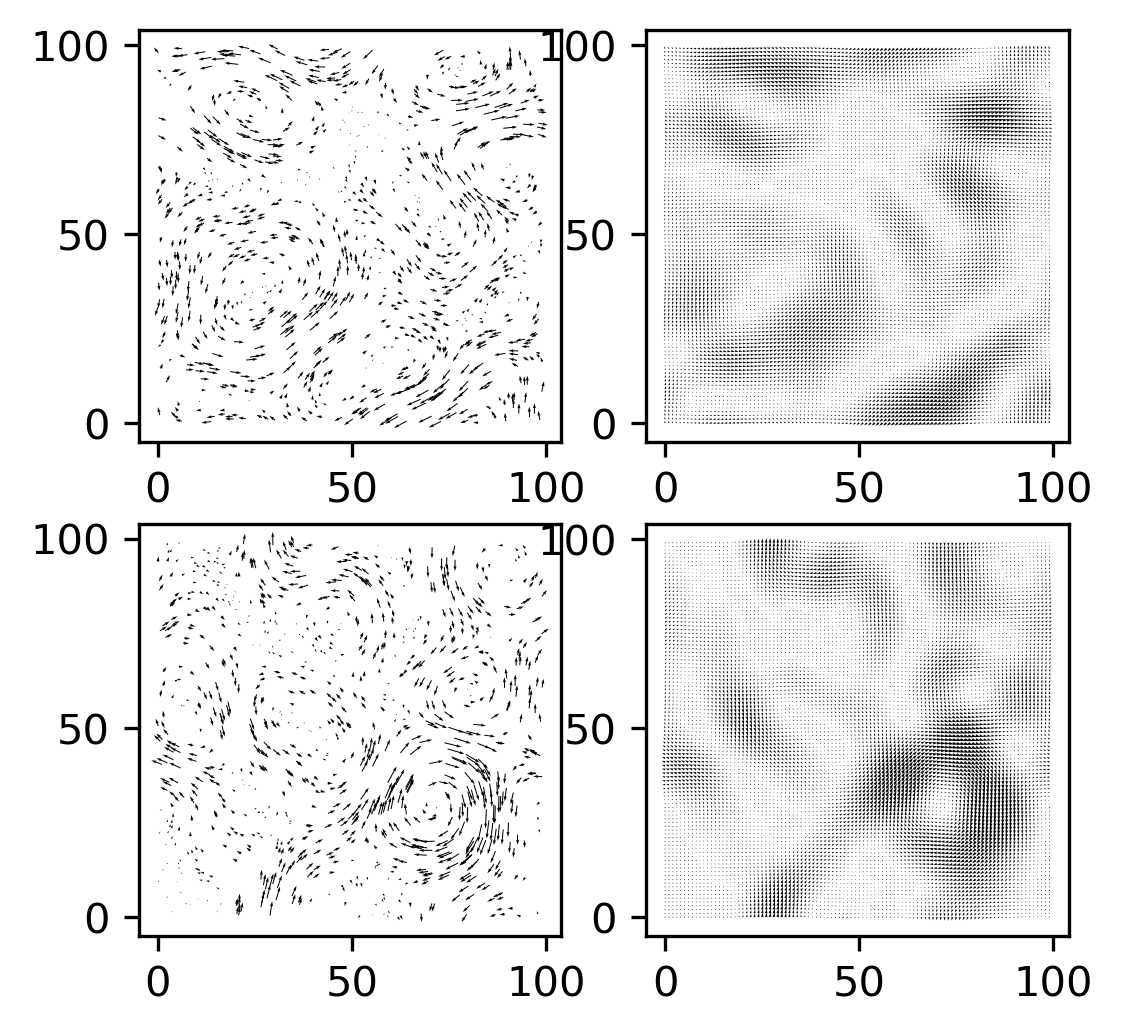

In [160]:
fig = plt.figure(figsize=(4,4), dpi=300)
fig.add_subplot(2,2,1)
plt.quiver( ForeGroundParticleX , ForeGroundParticleY , ForeGroundParticleVx , ForeGroundParticleVy , units='width' )
fig.add_subplot(2,2,2)
plt.quiver( ForeGroundVx , ForeGroundVy , units='width' )
fig.add_subplot(2,2,3)
plt.quiver( BackGroundParticleX , BackGroundParticleY , BackGroundParticleVx , BackGroundParticleVy , units='width' )
fig.add_subplot(2,2,4)
plt.quiver( BackGroundVx , BackGroundVy , units='width' )
plt.show()

# Particle evolution

In [161]:
MaxIterations = 500000
dt = 0.1
DisplayIteration = 10000

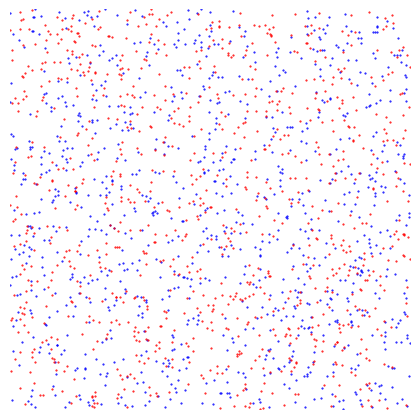

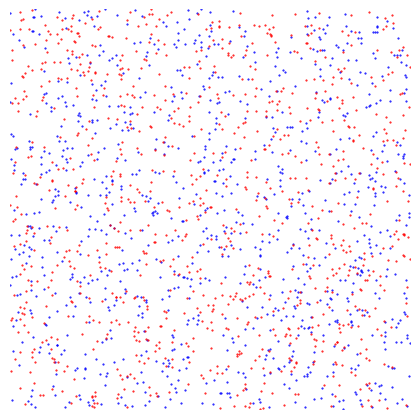

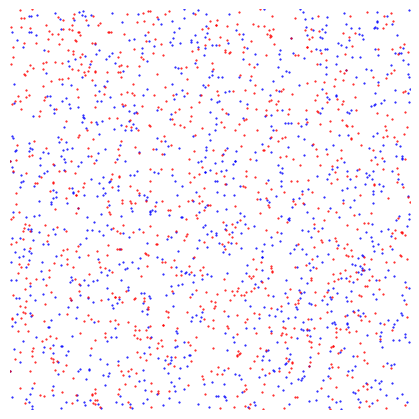

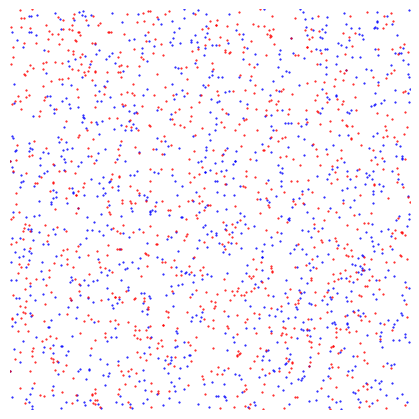

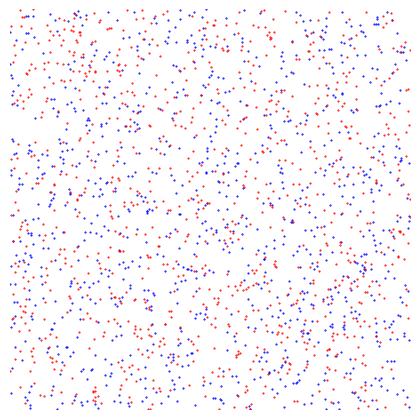

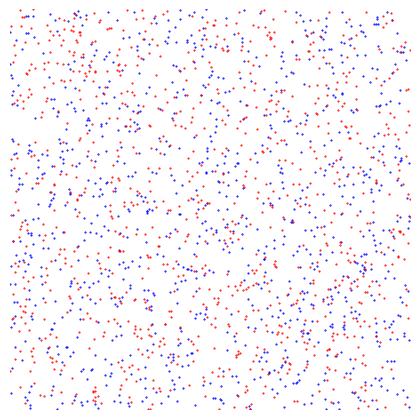

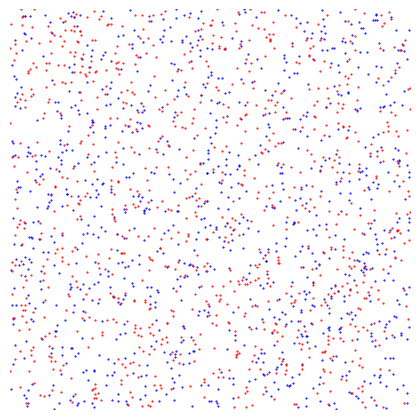

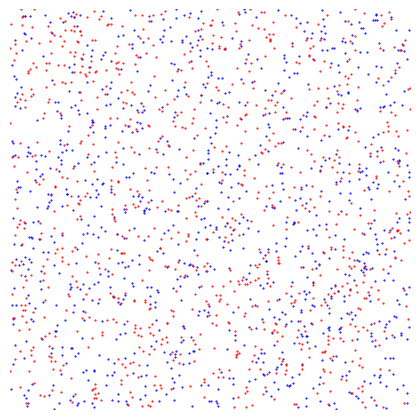

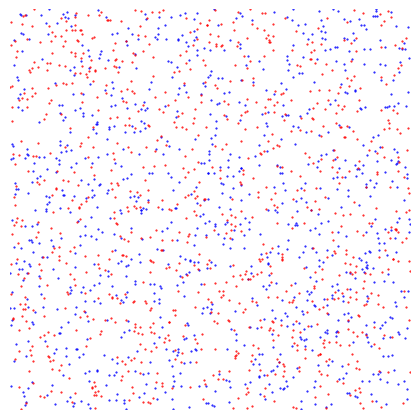

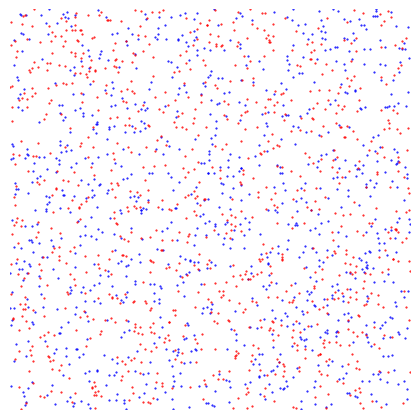

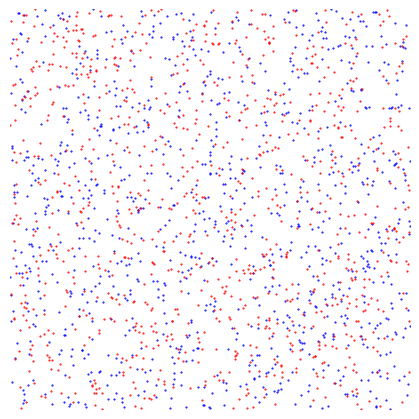

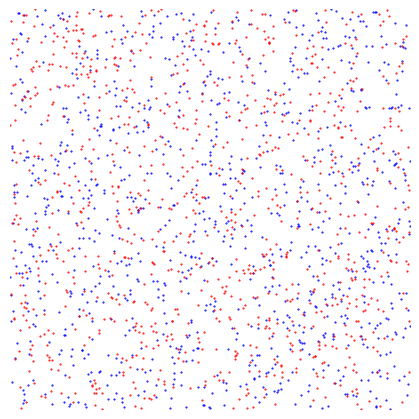

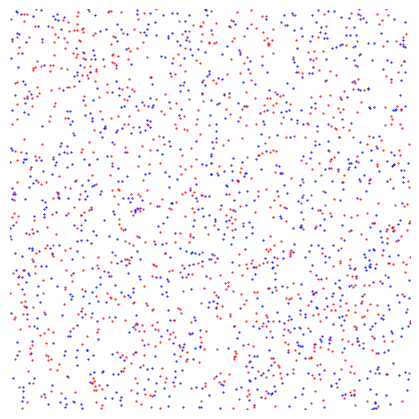

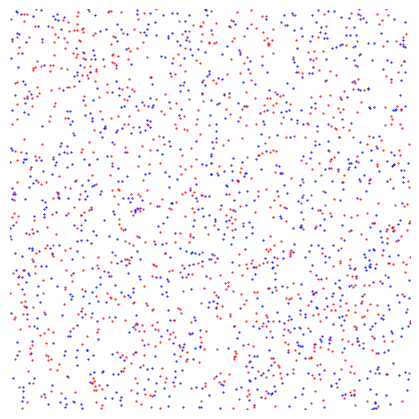

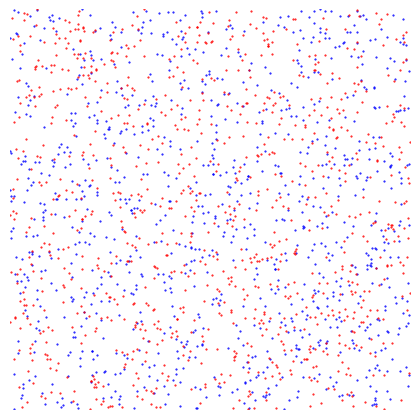

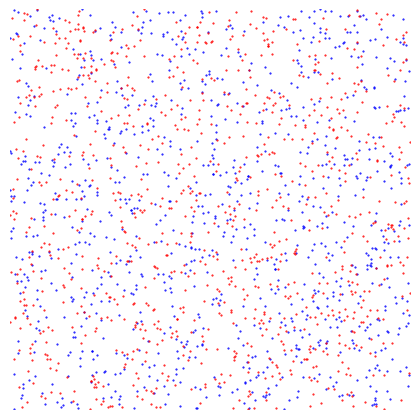

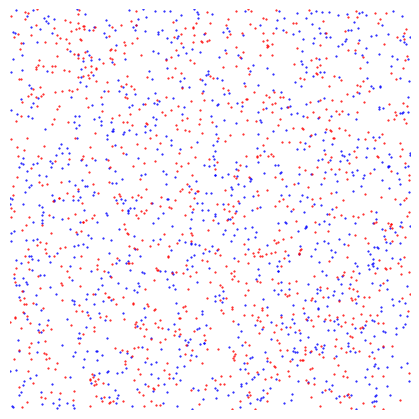

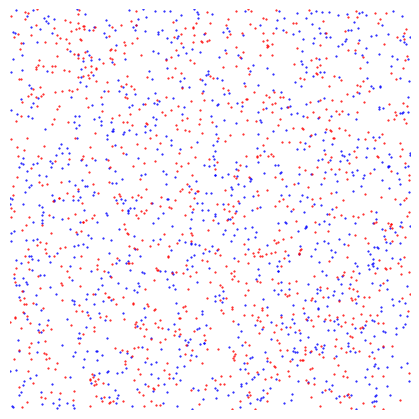

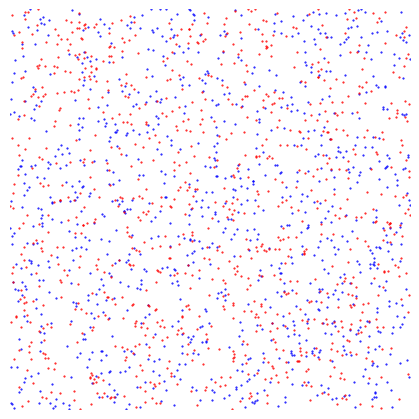

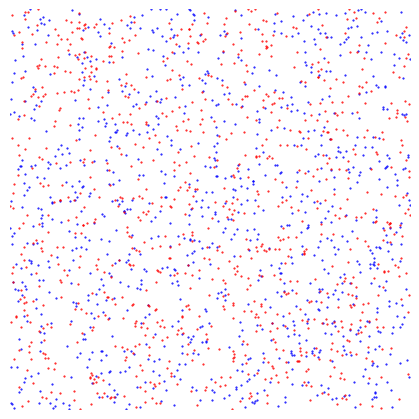

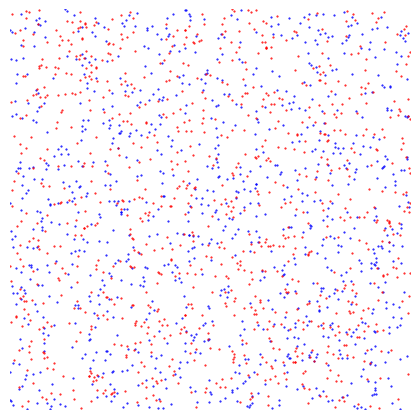

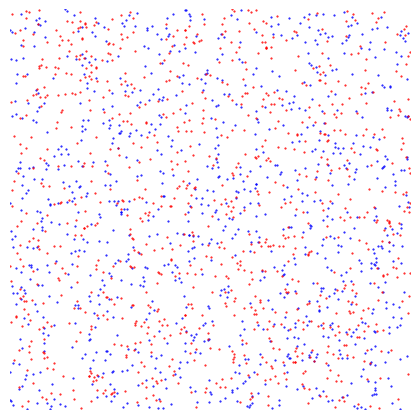

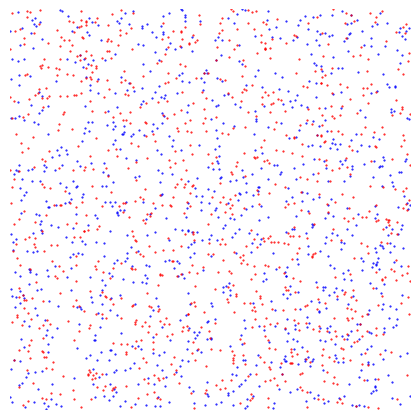

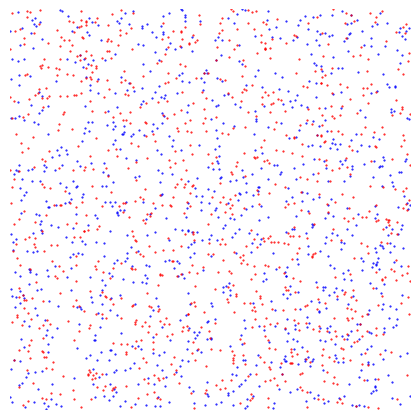

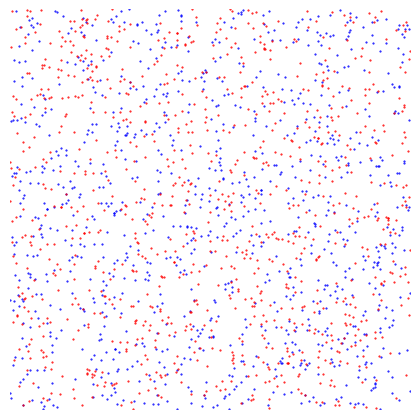

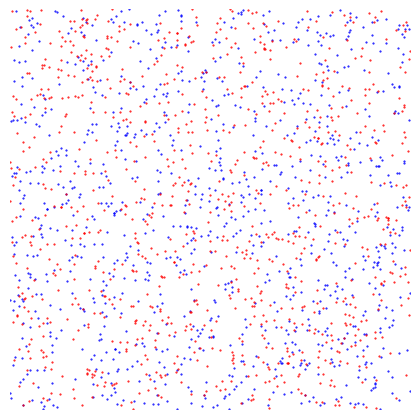

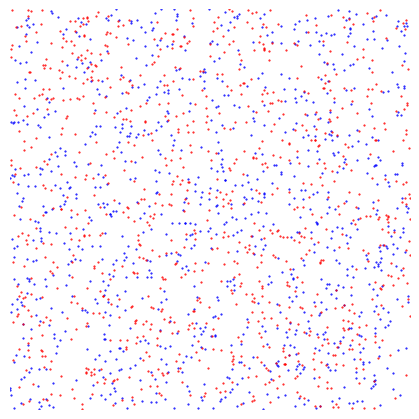

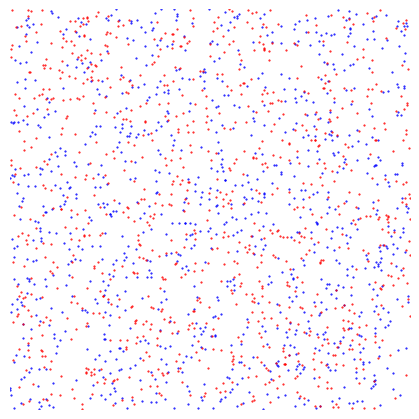

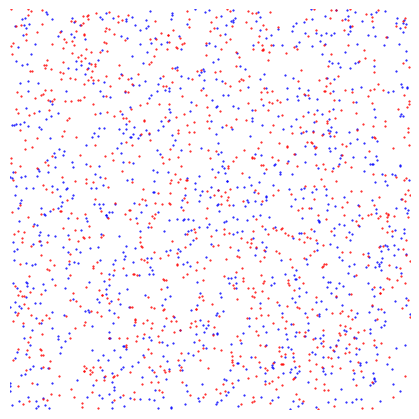

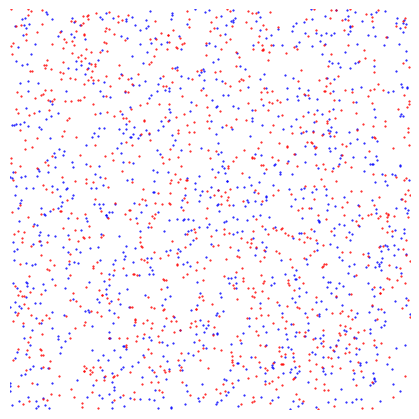

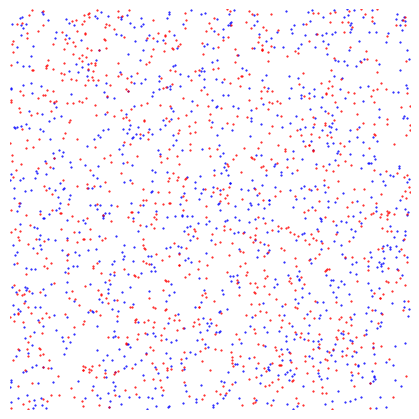

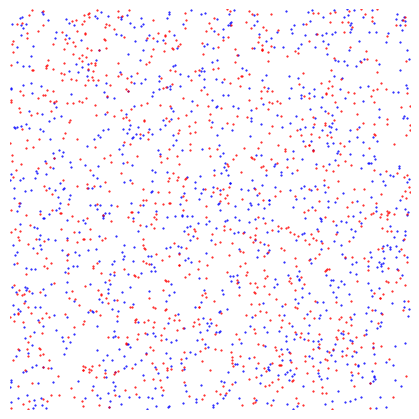

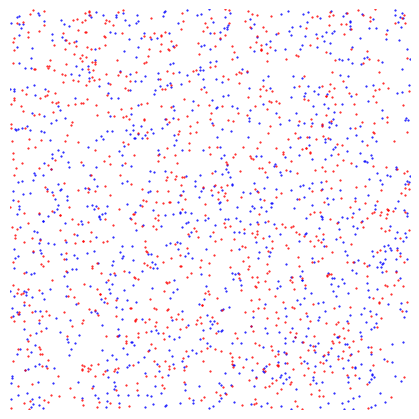

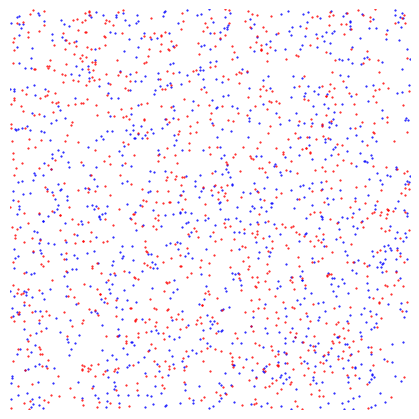

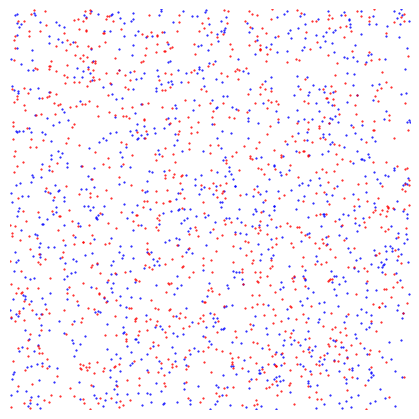

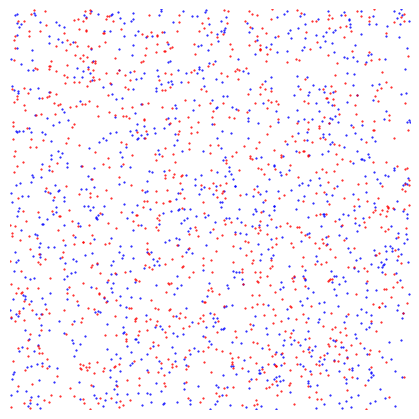

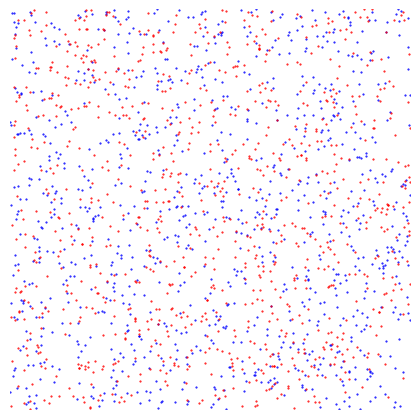

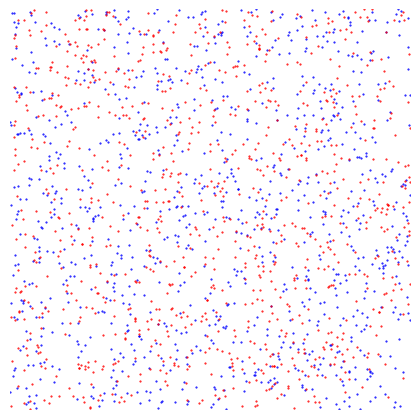

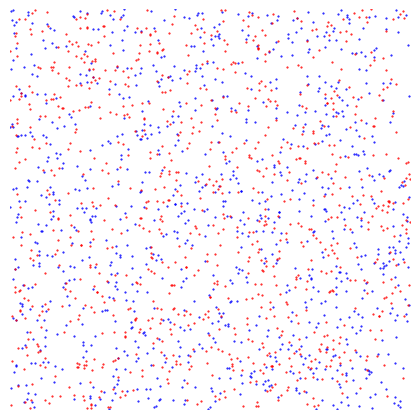

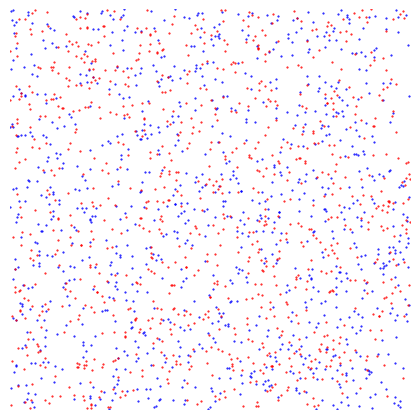

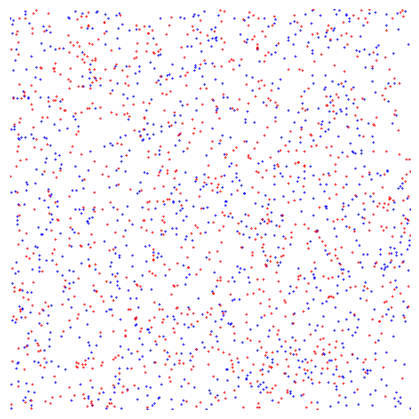

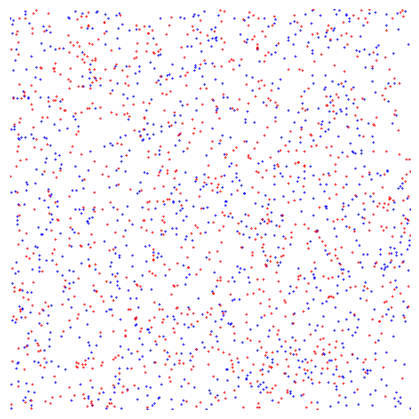

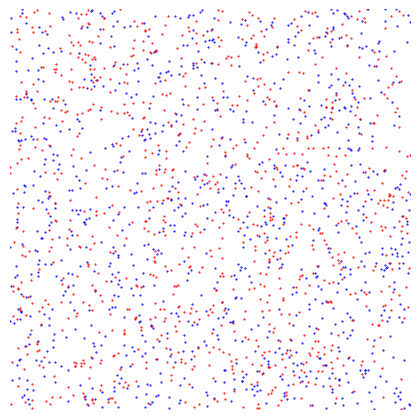

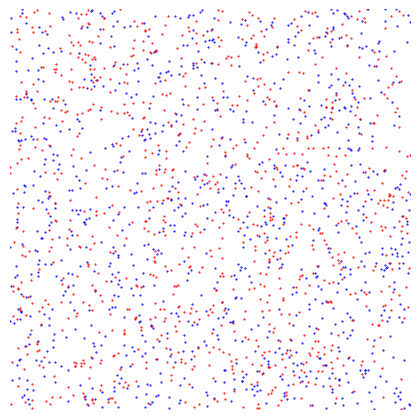

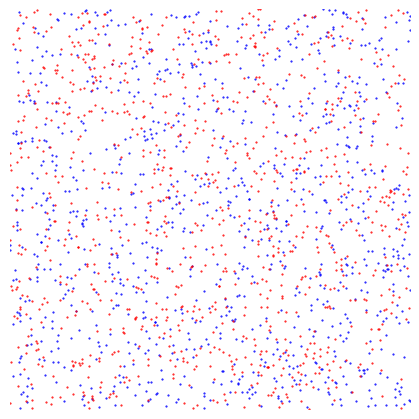

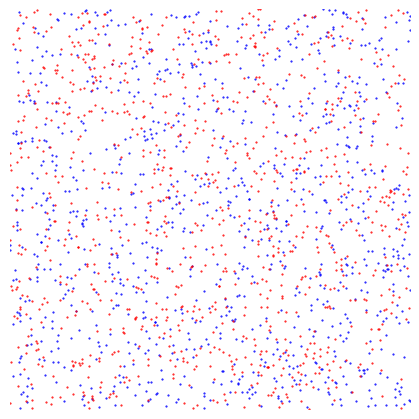

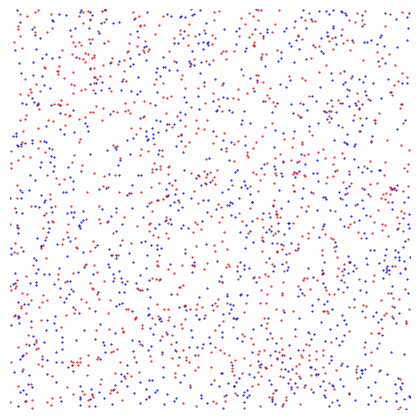

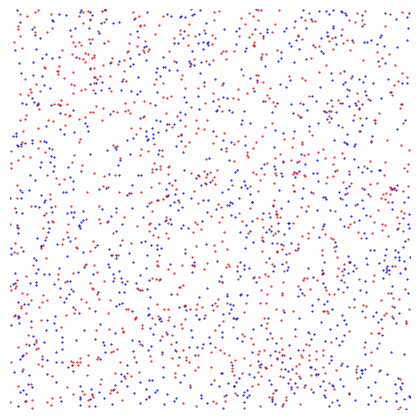

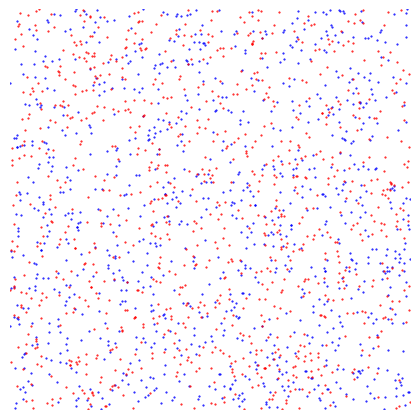

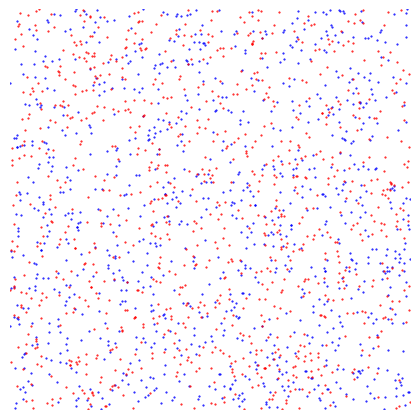

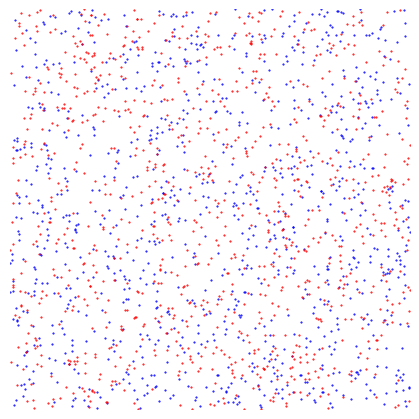

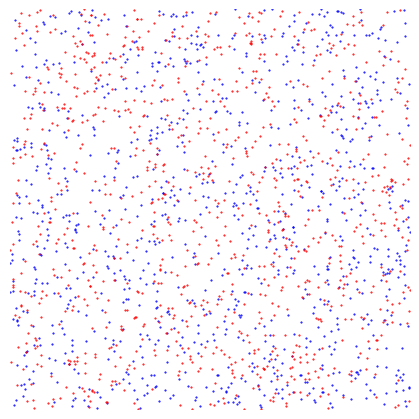

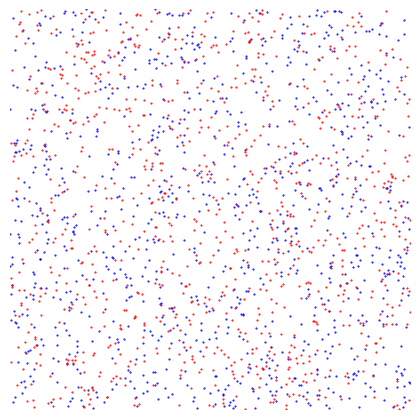

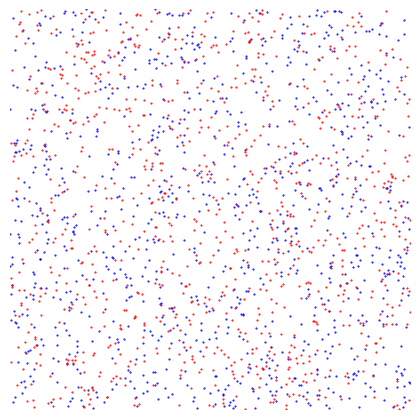

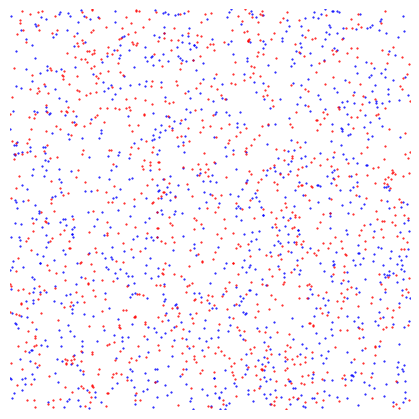

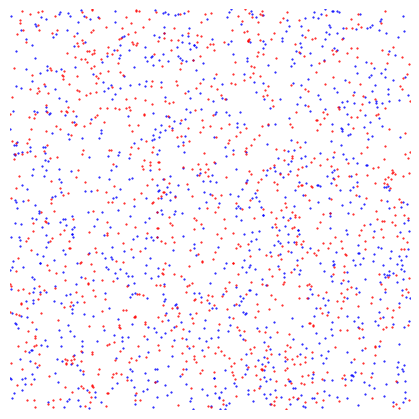

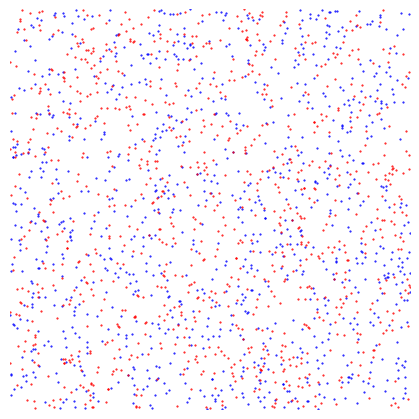

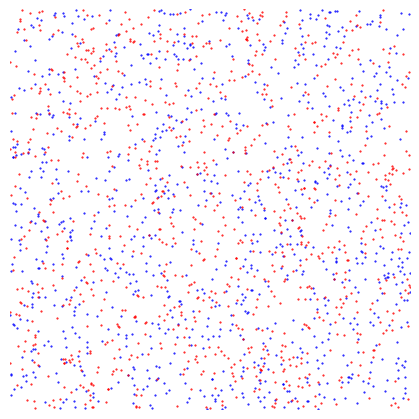

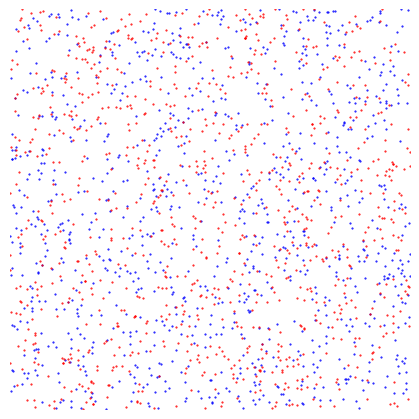

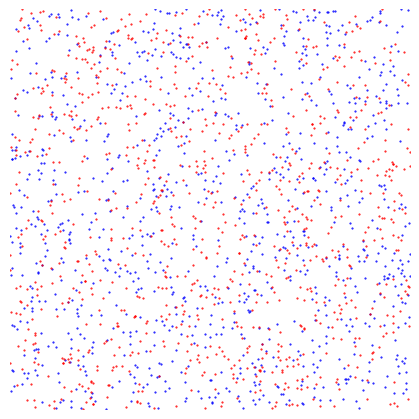

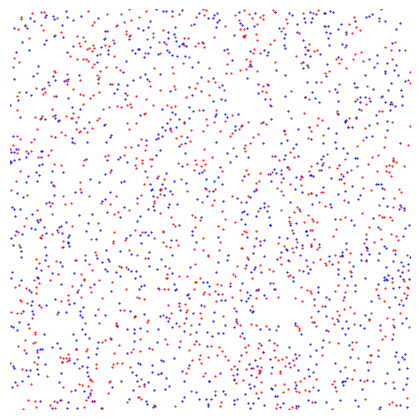

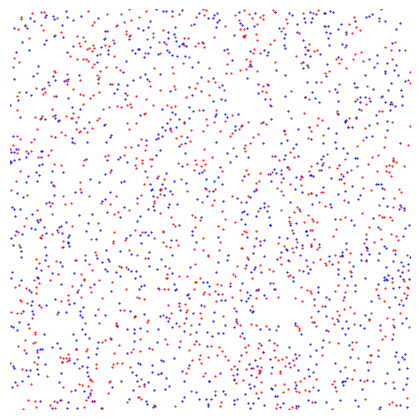

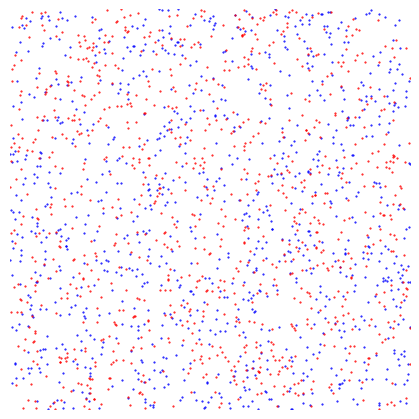

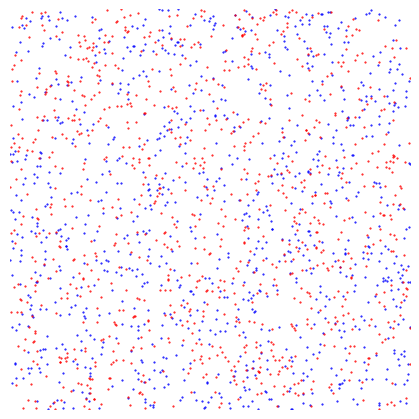

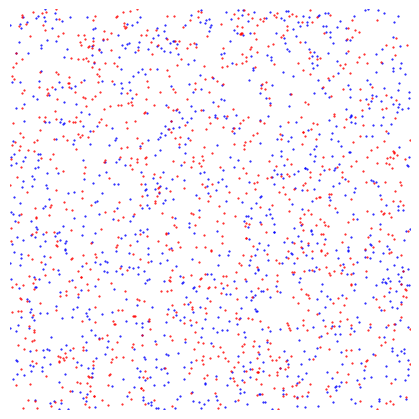

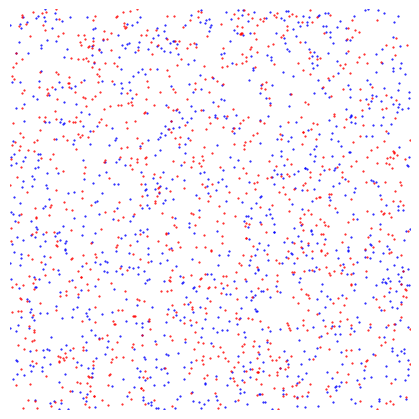

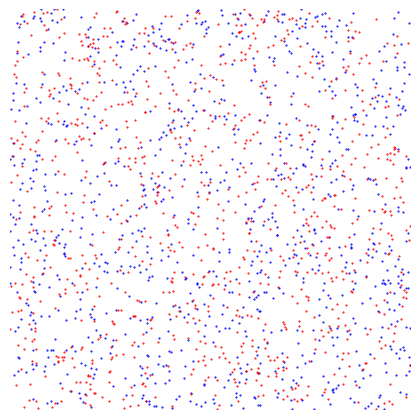

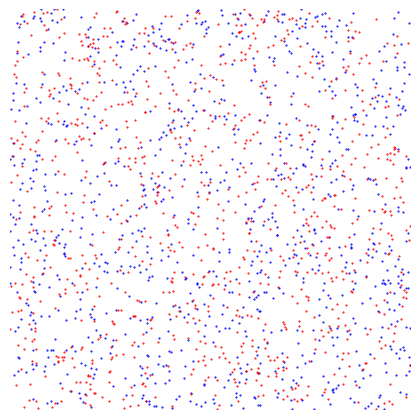

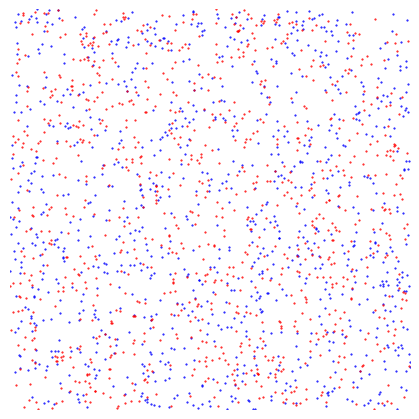

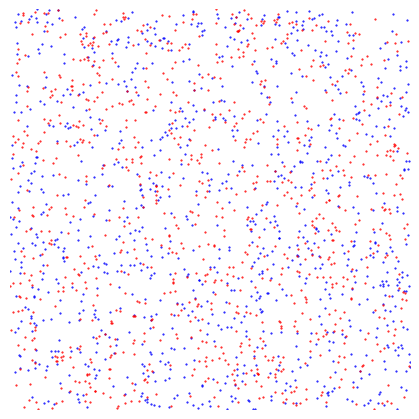

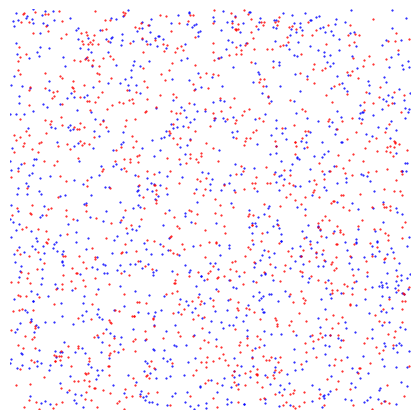

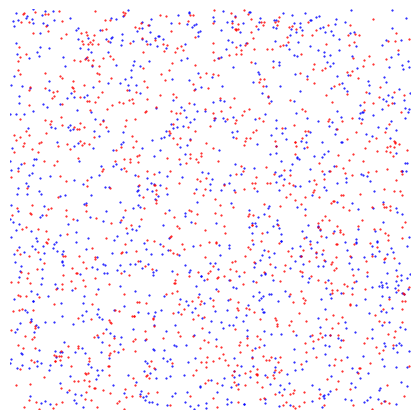

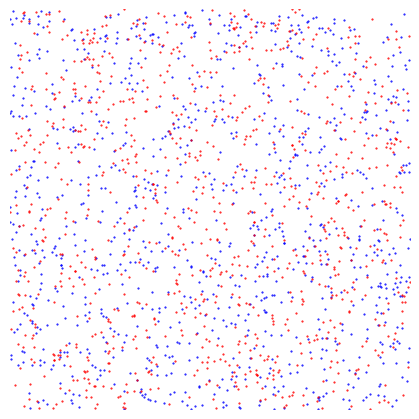

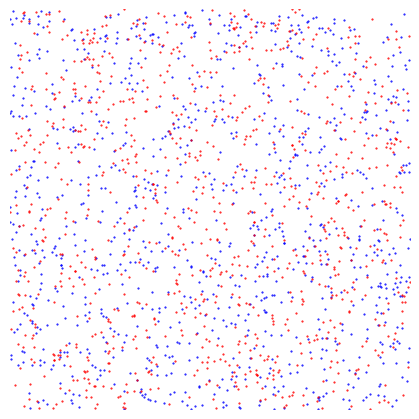

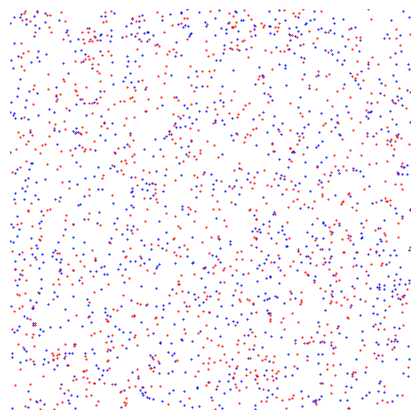

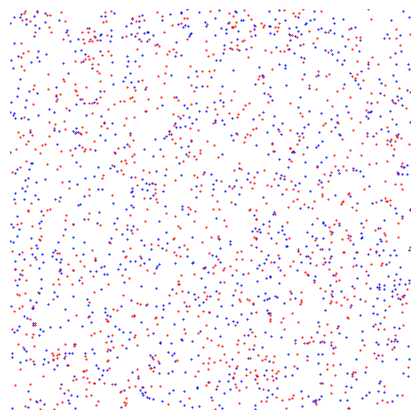

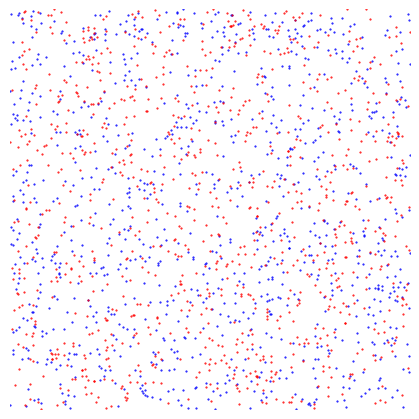

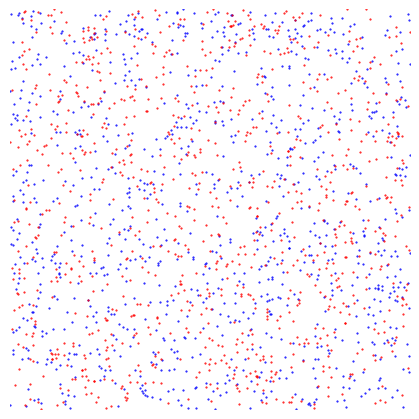

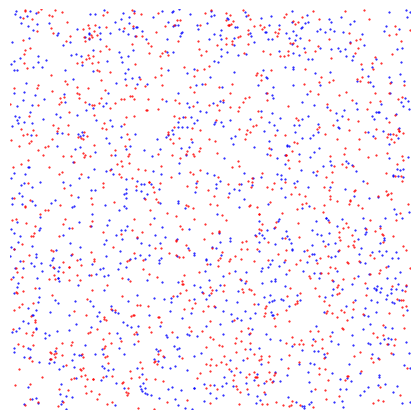

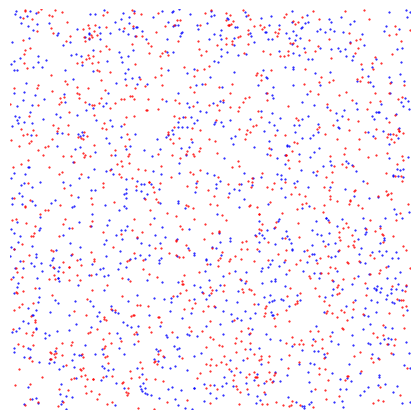

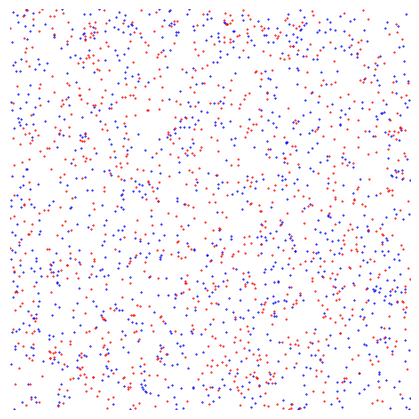

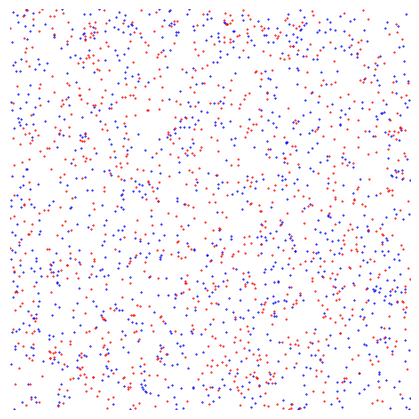

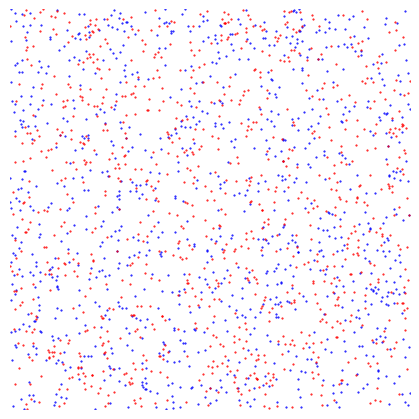

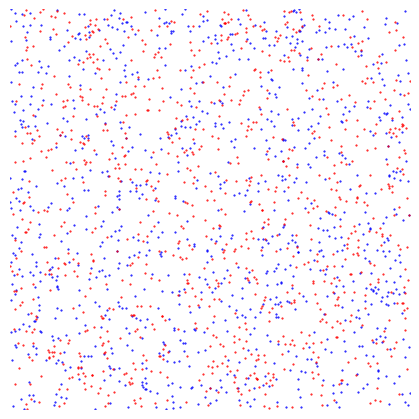

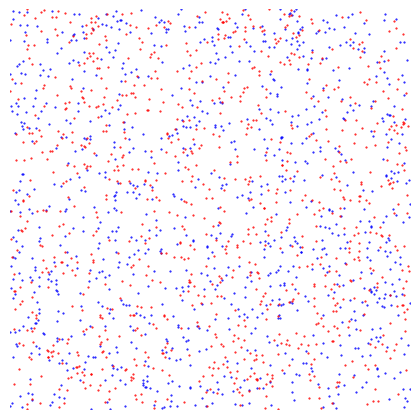

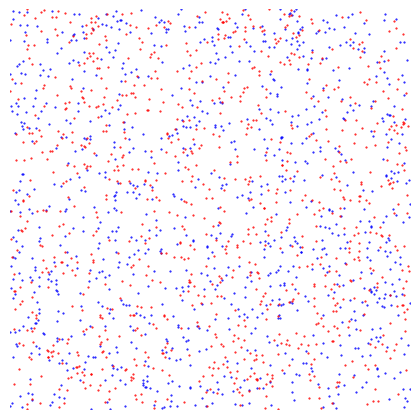

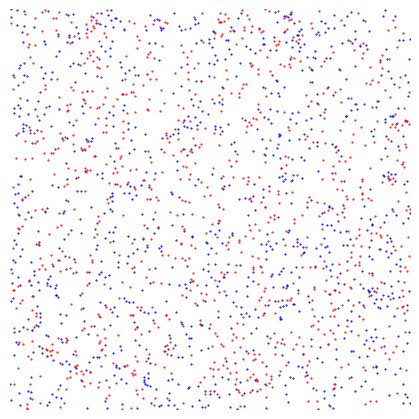

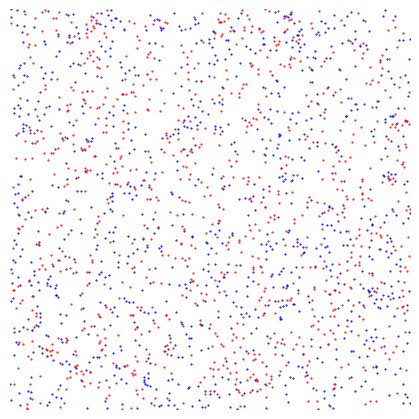

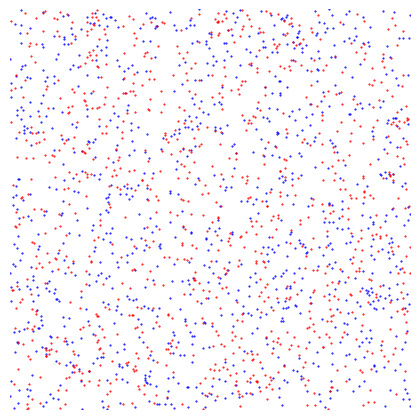

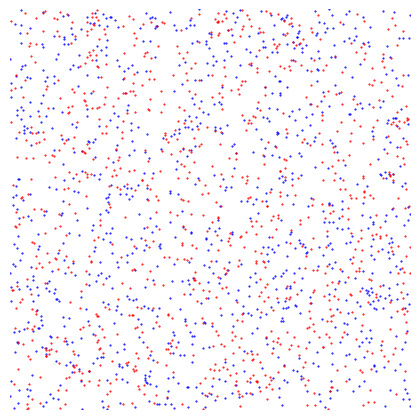

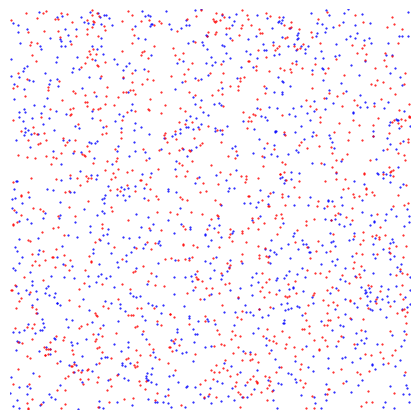

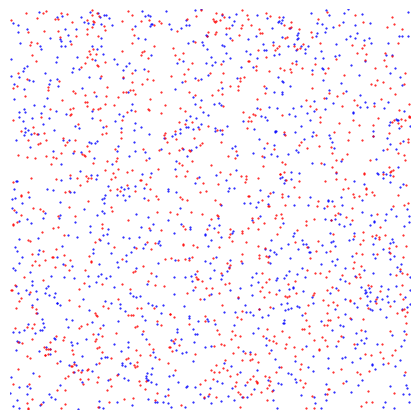

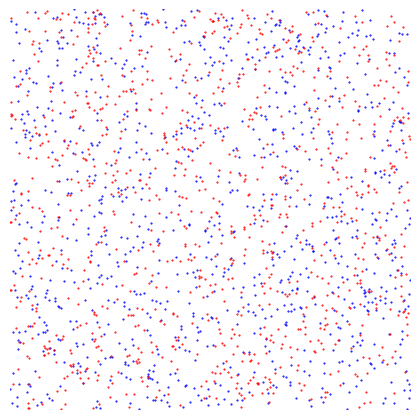

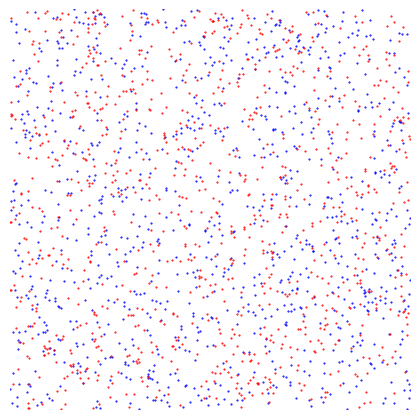

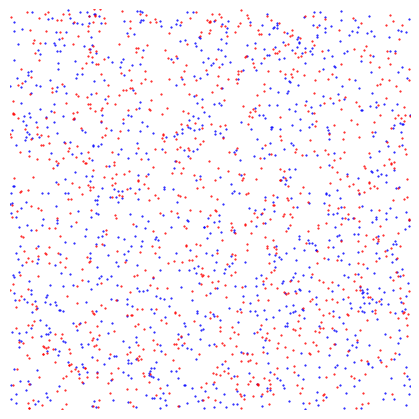

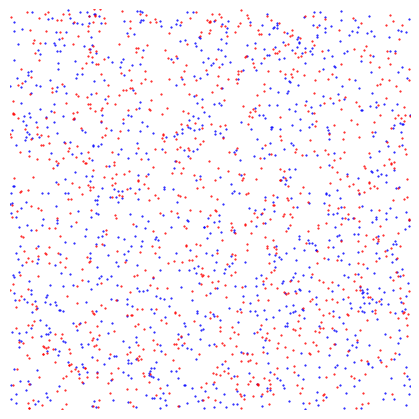

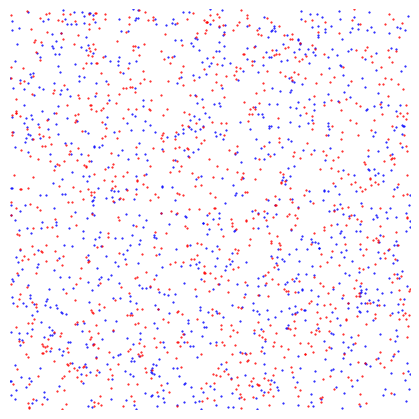

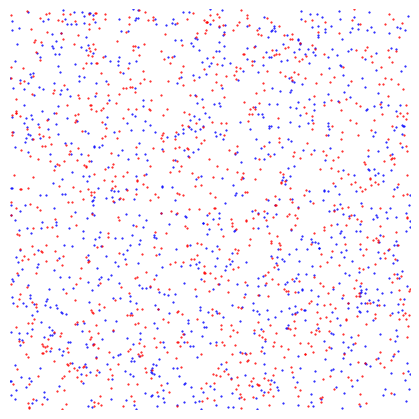

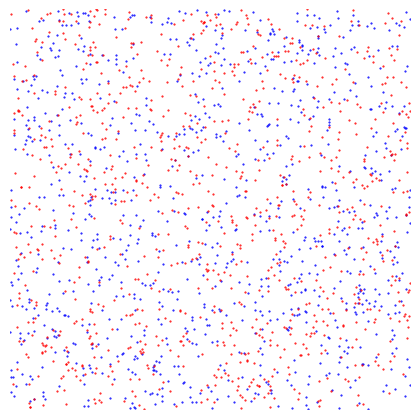

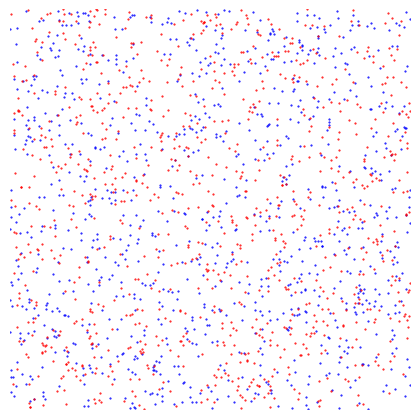

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

In [162]:
RGBimages = []
BWimages = []

for Iteration in range( MaxIterations ):

    # Estimate velocity at the particle position

    ForeGroundParticleVx = ForeGroundVxInterp( (ForeGroundParticleY , ForeGroundParticleX) )
    ForeGroundParticleVy = ForeGroundVyInterp( (ForeGroundParticleY , ForeGroundParticleX) )

    BackGroundParticleVx = BackGroundVxInterp( (BackGroundParticleY , BackGroundParticleX) )
    BackGroundParticleVy = BackGroundVyInterp( (BackGroundParticleY , BackGroundParticleX) )

    # Euler time evolution method 

    ForeGroundParticleX = ForeGroundParticleX + dt * ForeGroundParticleVx
    ForeGroundParticleY = ForeGroundParticleY + dt * ForeGroundParticleVy

    BackGroundParticleX = BackGroundParticleX + dt * BackGroundParticleVx
    BackGroundParticleY = BackGroundParticleY + dt * BackGroundParticleVy

    # Applying periodic boundary condition

    ForeGroundParticleX = np.mod( ForeGroundParticleX , GridSize-1 )
    ForeGroundParticleY = np.mod( ForeGroundParticleY , GridSize-1 )

    BackGroundParticleX = np.mod( BackGroundParticleX , GridSize-1 )
    BackGroundParticleY = np.mod( BackGroundParticleY , GridSize-1 )

    # Writing data

    if np.mod( Iteration , DisplayIteration )==0 :
        for PlotIteration in range(2):
            if (PlotIteration==0):
                Color1 = '.b'
                Color2 = '.r'
            else :
                Color1 = '.k'
                Color2 = '.k'
                
            fig = plt.figure(figsize=(4,4), dpi=100)
            ax = fig.gca()
            #Image from plot
            ax.axis('off')
            fig.tight_layout(pad=0)

            # To remove the huge white borders
            ax.margins(0)

            plt.plot( ForeGroundParticleX , ForeGroundParticleY , '.b' , markersize=1 )
            plt.plot( BackGroundParticleX , BackGroundParticleY , '.r' , markersize=1 )
            plt.axis('equal')
            plt.axis('off')
            plt.savefig('B.png',bbox_inches='tight',transparent=False,pad_inches = 0)
            I = plt.imread( 'B.png' )

            if (PlotIteration==0):
                RGBimages.append( I )
            else :
                BWimages.append( I )
        
            plt.show()

imageio.mimsave( 'RGBmovie.gif', RGBimages )
imageio.mimsave( 'BWmovie.gif', BWimages )

In [163]:
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images)

NameError: name 'filenames' is not defined